In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('StudentPerformance.csv')

In [6]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Text(0.5, 1.0, 'Cor')

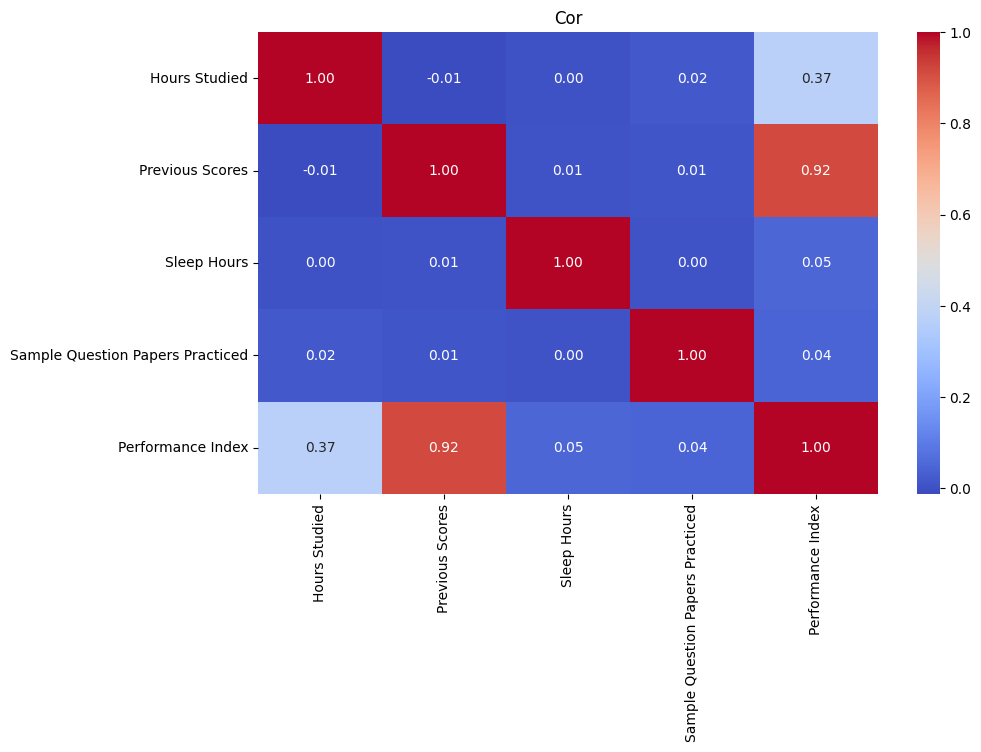

In [7]:

# Sirf numeric columns ka correlation nikalte hain
corr_matrix = df.corr(numeric_only=True)

# 3. Heatmap banana (Taake dekhne mein asaan ho)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cor')

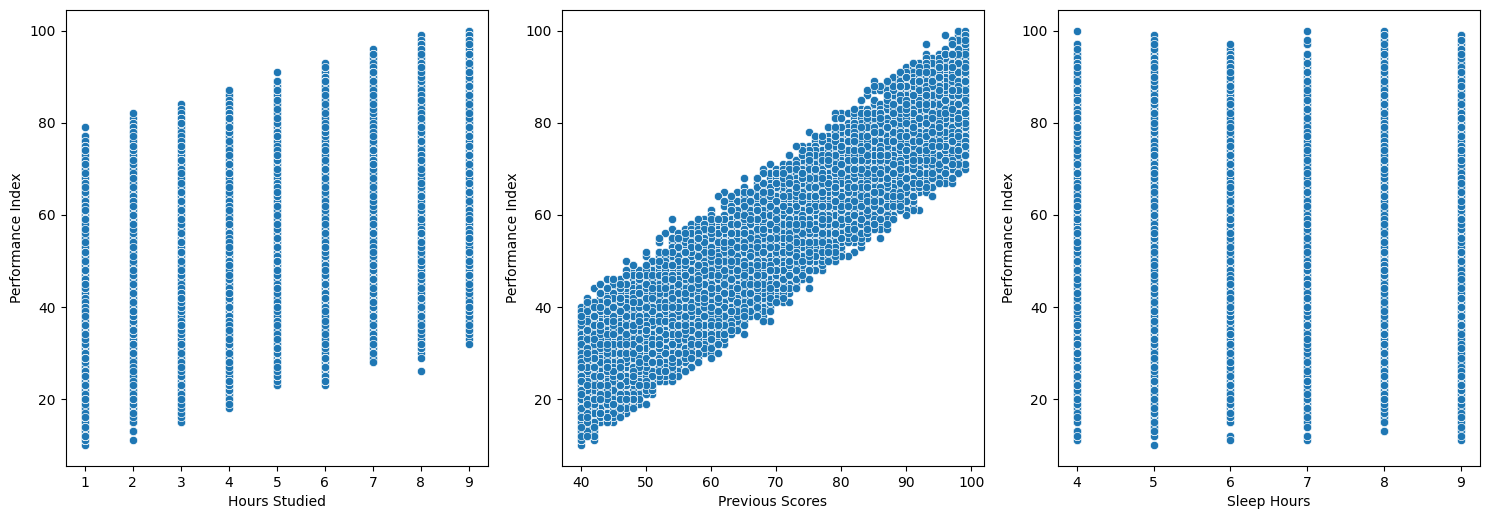

In [14]:
plt.figure(figsize=(15, 10))

# 1. Study Hours
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='Hours Studied', y='Performance Index')

# 2. Previous Scores
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='Previous Scores', y='Performance Index')

# 3. Sleep Hours
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='Sleep Hours', y='Performance Index')

# Isi tarah baaqi bhi...
plt.tight_layout()
plt.show()

In [40]:
df['Extracurricular Activities']=df['Extracurricular Activities'].map({"Yes":1,"No":0})

In [41]:
df.head(1)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91


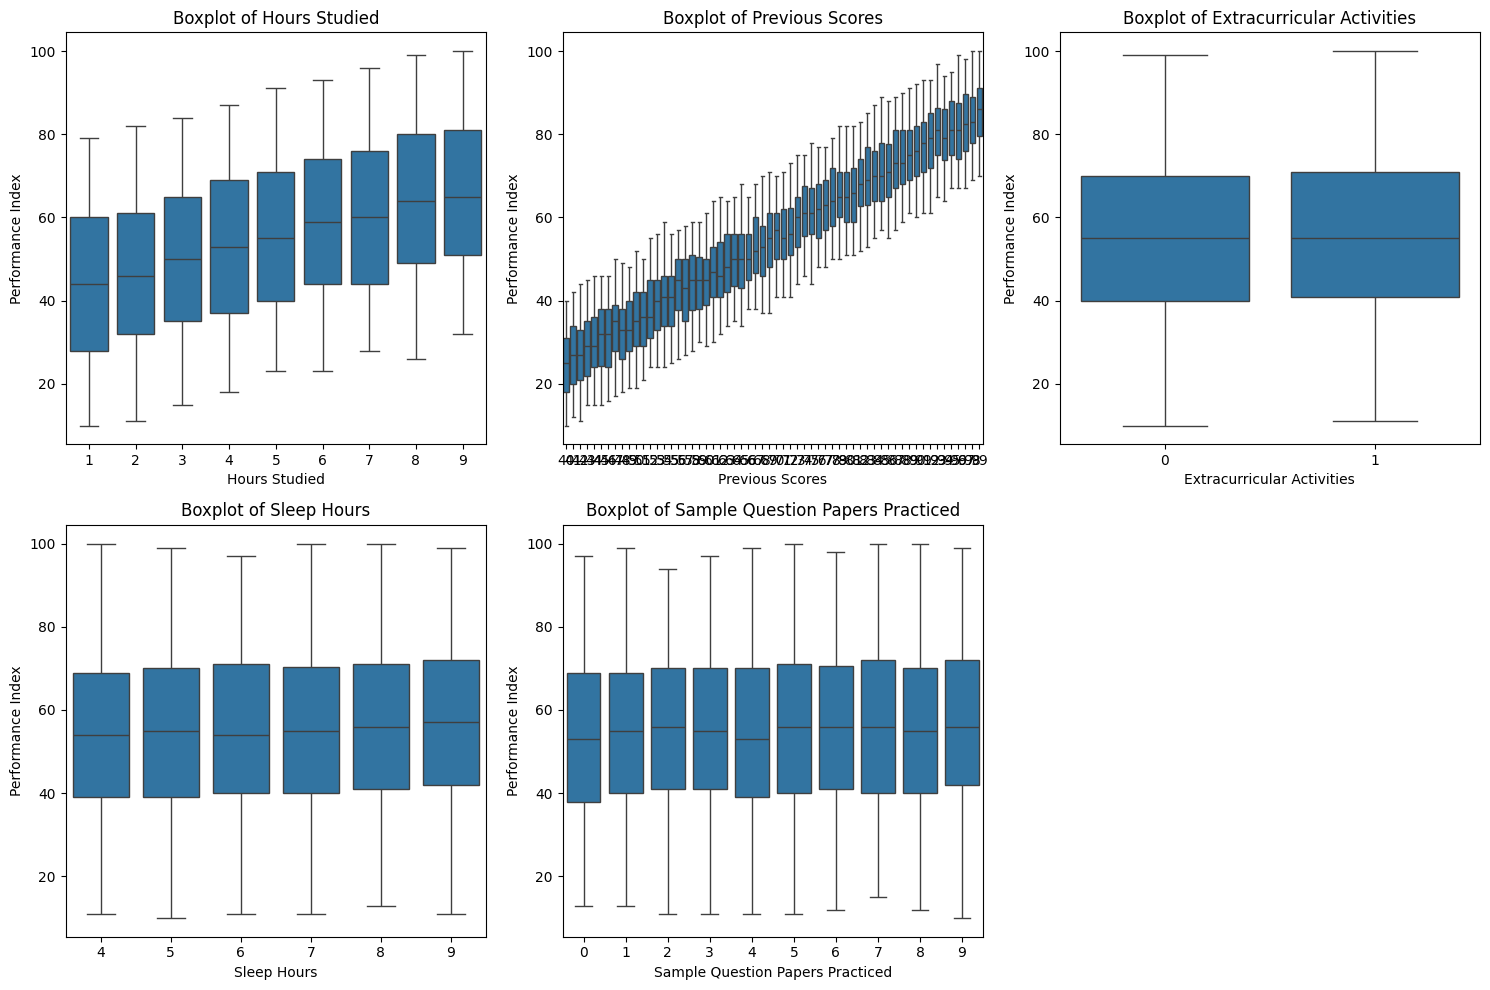

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

listt = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

# 2 rows aur 3 columns ka grid banate hain (Total 6 slots)
plt.figure(figsize=(15, 10))

for index, i in enumerate(listt):
    plt.subplot(2, 3, index + 1) # index 0 se shuru hota hai, isliye +1 kiya
    sns.boxplot(data=df, x=i, y='Performance Index') # y-axis par target zaroor rakhein
    plt.title(f"Boxplot of {i}")

plt.tight_layout() # Taake graphs aapas mein takrayen nahi
plt.show()

In [43]:
x=df.drop("Performance Index",axis=1)
y=df["Performance Index"]

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [70]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
scale=StandardScaler()
x_train_scale=scale.fit_transform(X_train)
x_test_scale=scale.transform(X_test)

In [77]:
model=LinearRegression()
model.fit(x_train_scale,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:


# 1. Check karein model kitna accurate hai (R2 Score 1.0 ke jitna kareeb ho utna behtar)
score = r2_score(y_test, y_pred)
print(f"Model Accuracy (R2 Score): {score * 100:.2f}%")

# 2. Check karein average galti kitni hai
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Model Accuracy (R2 Score): 98.90%
Mean Squared Error: 4.08
